In [1]:
'''THis block of code pre processes the data'''
from nltk.stem import WordNetLemmatizer
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize,sent_tokenize

import csv
                                            
file_path = 'Data_mesh_csv.csv'

# Read the TSV file and convert it to a DataFrame
df = pd.read_csv(file_path, delimiter=',')



c:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df

,Filename,Content,Publisher
0,Breaking_Down_Data_Silos_Data_Mesh_to_Achieve_...,chieve \nEffective Aggregation in Data Localiz...,IEEE
1,Decentralized_Data_Governance_as_Part_of_a_Dat...,"pproaches \n Arif Wider 1,2 , Sumedha Verma ...",IEEE
2,Enterprise_Data_Strategy_A_Decentralized_Data_...,Decentralized Data Mesh\nApproach\nVijay Kuma...,IEEE
3,Finding_Your_Way_Through_the_Jungle_of_Big_Dat...,"rchitectures\nTorsten Priebe, Sebastian Neumai...",IEEE
4,978-1-4842-9253-2_1,"\nWhen you look back in time, data architectur...",Springer
5,978-1-4842-9253-2_10,\nIn this chapter we provide a high-level over...,Springer
6,978-1-4842-9253-2_11,\nIn Chapter 1 we saw that a Data Fabric archi...,Springer
7,978-1-4842-9253-2_12,"\nIn this chapter, we look at the intersection...",Springer
8,978-1-4842-9253-2_13,"to Metadata Management\nIn the digital era, e...",Springer
9,978-1-4842-9253-2_14,\nApplying AI to metadata management and intel...,Springer


In [3]:
import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Load stop words from NLTK library
nltk_stop_words = set(stopwords.words('english'))
print("Number of stop words from NLTK:", len(nltk_stop_words))

# Load stop words from CSV file into a DataFrame with the appropriate encoding
csv_file_path = "Data_mesh_words.csv"
words_df = pd.read_csv(csv_file_path, header=None, names=["stopword"], encoding="ISO-8859-1")
custom_stop_words = set(map(str.lower, words_df["stopword"]))

# Combine stop words from both sources
stop_words = nltk_stop_words.union(custom_stop_words)

# Add words from CSV file to stop_words set
with open(csv_file_path, mode='r') as file:
    reader = csv.reader(file)
    # Skip header
    next(reader, None)
    # Add words to stop_words set
    for row in reader:
        word = row[0].lower().strip()
       
        stop_words.add(word)






Number of stop words from NLTK: 179


In [4]:
words_to_check = ['http', 'com', 'author','license' ]

# Check if each word is in stop_words, and if not, add it
for word in words_to_check:
    if word not in stop_words:
        print(f"Adding '{word}' to stop_words")
        stop_words.add(word)

# Print the updated stop_words set
print("Updated stop words set:", stop_words)

Updated stop words set: {'had', 'www', 'library', 'but', 'coef', 'xx', 'have', "should've", 'license ', 'yourself', 'chapter', 'onlinelibrary', "wasn't", 'predefined', 'social', 'under', 'business', 'procedia', 'technische', 'used', 'most', 'scientific', 'numerical', 'al', 'open', 'thesis', 'zero', 'did', 'tjoa', 'rent', 'wilfr\xa0', 'yours', 'kayem', 'while', 'team', 'et', 'his', 'than', 'is', 'apply', 'wilfr', 'access', 'preprints', 'information', 'above', 'up', "that'll", 'against', 'before', 'trying', 'll', 'below', 'our', 'won', 'y', 'lin', 'college', 'into', 'creativecommons', 'machado', 'computer', 'multi', 'an', 'hu', "you're", 'who', 'online', 'university', 'wouldn', "needn't", 'hasn', 'com', 'project', 'care', 'few', 'very', 'elsevier', 'araújo', "weren't", 'such', 'haven', 'no', 'architecture', 'year', 'http', 'ourselves', 'has', 'xxx', 'can', 'more', 'ingolstadt', 'araãºjo', 'then', 'layer', 'reviewed', 'challenge\xa0', 'theirs', 'me', 'internet', 'for', 'and', 'central', '

In [5]:
def clean_text(text):
    # Remove HTML tags and non-English characters
    text = re.sub(r"<[^>]+>", "", str(text))
    text = re.sub(r"[^A-Za-zÀ-ž ]", " ", str(text))

    # Tokenize and convert to lowercase
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    # Remove single characters and numbers
    words_filtered = [word for word in words_tokens_lower if len(word) > 1 and not word.isnumeric()]

    # Remove stop words
    words_filtered = [word for word in words_filtered if word not in stop_words]

    # Lemmatize words
    words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]

    # Join the words back into a string
    text_clean = " ".join(words_lemmatized)
    return text_clean


In [6]:
def drop_nan(df):
    
    df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True)
    
    return df
pdf_data = df.copy()
drop_nan(pdf_data)
pdf_data['Content'] = pdf_data['Content'].apply(clean_text)


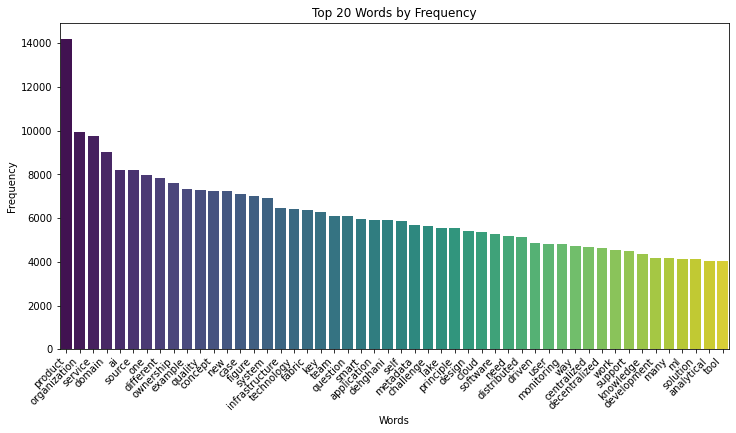

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pdf_content' column contains the cleaned text
text_combined = ' '.join(pdf_data['Content'])

# Tokenize the text
tokens = word_tokenize(text_combined)

# Count the frequency of each word
word_freq = nltk.FreqDist(tokens)

# Create a DataFrame from the frequency distribution
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top N words by frequency in a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(50), palette='viridis')
plt.title('Top 20 Words by Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
pdf_data

,Filename,Content,Publisher
0,Breaking_Down_Data_Silos_Data_Mesh_to_Achieve_...,chieve effective aggregation localization jaga...,IEEE
1,Decentralized_Data_Governance_as_Part_of_a_Dat...,pproaches arif wider sumedha verma atif akhtar...,IEEE
2,Enterprise_Data_Strategy_A_Decentralized_Data_...,decentralized vijay kumar butte sujata butte i...,IEEE
3,Finding_Your_Way_Through_the_Jungle_of_Big_Dat...,rchitectures torsten priebe sebastian neumaier...,IEEE
4,978-1-4842-9253-2_1,look back architecture developed response pain...,Springer
5,978-1-4842-9253-2_10,provide high overview fabric evolution elabora...,Springer
6,978-1-4842-9253-2_11,saw fabric evolution previous architecture inf...,Springer
7,978-1-4842-9253-2_12,look intersection two initiative digital trans...,Springer
8,978-1-4842-9253-2_13,metadata digital era enterprise know aspect mu...,Springer
9,978-1-4842-9253-2_14,applying ai metadata intelligent cataloging qu...,Springer


In [9]:
csv_filename = 'Data_mesh_cleaned.csv'

# Save the DataFrame to a CSV file
pdf_data.to_csv(csv_filename, index=False)

In [10]:
word_freq_df.head(20)

,Word,Frequency
159,product,14217
52,organization,9927
305,service,9766
158,domain,9028
1466,ai,8212
416,source,8208
102,one,7960
28,different,7823
322,ownership,7620
503,example,7323
